In [25]:
import pandas as pd

In [26]:
df20 = pd.read_csv('data/adjusted_vacancies_2020.csv')
df20.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,salary_currency,salary_gross,type_id,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,True,False
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,NaN,NaN,open,СКБ Контур,fullDay,moreThan6,full,False,False
3,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
4,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
5,False,Data Engineer (Information Retrieval Team),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
6,False,Senior Data Scientist (Computer Vision),NaN,NaN,1002,Минск,False,False,NaN,NaN,NaN,NaN,open,IHS Global,fullDay,between3And6,full,True,False
7,False,Ведущий специалист по Machine learning (3D-алг...,NaN,NaN,1,Москва,False,False,250000.0,NaN,RUR,False,open,Адалиск,flexible,between3And6,full,True,False
8,False,Аналитик ИСУ (Data Analyst),3529-3529-it,Сбер. IT,26,Воронеж,False,False,NaN,NaN,NaN,NaN,open,Сбербанк,fullDay,between1And3,full,False,False
9,False,Аналитик данных,NaN,NaN,88,Казань,False,False,NaN,NaN,NaN,NaN,open,АК БАРС ДОМ,fullDay,between1And3,full,True,False


In [27]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   997 non-null    bool   
 1   name                      997 non-null    object 
 2   department_id             189 non-null    object 
 3   department_name           189 non-null    object 
 4   area_id                   997 non-null    int64  
 5   area_name                 997 non-null    object 
 6   has_test                  997 non-null    bool   
 7   response_letter_required  997 non-null    bool   
 8   salary_from               123 non-null    float64
 9   salary_to                 95 non-null     float64
 10  salary_currency           157 non-null    object 
 11  salary_gross              157 non-null    object 
 12  type_id                   997 non-null    object 
 13  employer_name             997 non-null    object 
 14  schedule_i

In [28]:
df24 = pd.read_csv('data/adjusted_vacancies_2024.csv')
df24.head()

,premium,name,has_test,response_letter_required,department_id,department_name,area_id,area_name,salary_from,salary_to,salary_currency,salary_gross,type_id,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview
0,False,Junior Data Scientist,False,False,NaN,NaN,74,Польша,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
1,False,Junior Data Scientist,False,False,NaN,NaN,146,Сербия,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
2,False,Junior Data Engineer,False,False,NaN,NaN,13,Армения,NaN,900.0,EUR,True,open,AppQuantum,fullDay,between1And3,full,False,False
3,False,Junior Data Scientist,False,False,NaN,NaN,13,Армения,NaN,NaN,NaN,NaN,open,HIRE5 INC,remote,between1And3,full,False,False
4,False,"Разработчик операций AI, Python/React (Удаленн...",False,False,NaN,NaN,146,Сербия,NaN,NaN,NaN,NaN,open,LATOKEN,remote,noExperience,full,False,False


In [29]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   premium                   2289 non-null   bool   
 1   name                      2289 non-null   object 
 2   has_test                  2289 non-null   bool   
 3   response_letter_required  2289 non-null   bool   
 4   department_id             617 non-null    object 
 5   department_name           617 non-null    object 
 6   area_id                   2289 non-null   int64  
 7   area_name                 2289 non-null   object 
 8   salary_from               403 non-null    float64
 9   salary_to                 275 non-null    float64
 10  salary_currency           475 non-null    object 
 11  salary_gross              475 non-null    object 
 12  type_id                   2289 non-null   object 
 13  employer_name             2289 non-null   object 
 14  schedule

In [30]:
df20.describe()

,area_id,salary_from,salary_to
count,997.000000,1.230000e+02,9.500000e+01
mean,109.762287,1.565309e+05,2.084116e+05
std,358.642511,1.949022e+05,2.673112e+05
min,1.000000,1.000000e+03,3.100000e+03
25%,1.000000,8.000000e+04,8.500000e+04
50%,1.000000,1.400000e+05,1.500000e+05
75%,26.000000,2.000000e+05,2.800000e+05
max,2760.000000,2.100000e+06,2.400000e+06


In [31]:
df24.describe()

,area_id,salary_from,salary_to
count,2289.000000,4.030000e+02,2.750000e+02
mean,180.612495,1.930588e+05,3.941533e+05
std,606.961758,1.116285e+06,2.552391e+06
min,1.000000,6.000000e+00,8.000000e+02
25%,1.000000,5.000000e+04,5.185000e+04
50%,1.000000,8.700000e+04,1.100000e+05
75%,26.000000,1.500000e+05,2.500000e+05
max,6011.000000,2.000000e+07,3.000000e+07


In [32]:
df20['salary_currency'].value_counts()

RUR    135
USD     10
EUR      6
KZT      5
UAH      1
Name: salary_currency, dtype: int64

In [33]:
df24['salary_currency'].value_counts()

RUR    406
USD     44
KZT     13
EUR      4
UZS      4
BYR      2
KGS      2
Name: salary_currency, dtype: int64

In [34]:
df20['salary_from']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
992   NaN
993   NaN
994   NaN
995   NaN
996   NaN
Name: salary_from, Length: 997, dtype: float64

## 1. Comparison between years

Have the vacancy pool characteristics (number of vacancies, mean salary, expected experience, number of employer countries) changed over last 5 years?

In [35]:
# check whether salary distributions of two datasets are similar

# take salary_from and salary_currency columns into one df
df20_sal_from = df20[['salary_from', 'salary_currency']].dropna()
df24_sal_from = df24[['salary_from', 'salary_currency']].dropna()
df20_sal_to = df20[['salary_to', 'salary_currency']].dropna()
df24_sal_to = df24[['salary_to', 'salary_currency']].dropna()

print("Number of rows in each dataframe: ", len(df20_sal_from), len(df24_sal_from), len(df20_sal_to), len(df24_sal_to))


Number of rows in each dataframe:  123 403 95 275


In [36]:
df20_sal_from

,salary_from,salary_currency
7,250000.0,RUR
27,70000.0,RUR
29,80000.0,RUR
31,120000.0,RUR
36,200000.0,RUR
...,...,...
954,50000.0,RUR
964,250000.0,RUR
965,250000.0,RUR
966,250000.0,RUR


In [37]:
currency = {'USD': 90, 'EUR': 99, 'RUR': 1, 'KZT': 0.20, 'BYR': 28, 'UZS': 0.0072, 'KGS': 1.1, 'UAH': 2.4}

df20_sal_from['salary_from'] = df20_sal_from['salary_from'] * df20_sal_from['salary_currency'].map(currency)
df24_sal_from['salary_from'] = df24_sal_from['salary_from'] * df24_sal_from['salary_currency'].map(currency)
df20_sal_to['salary_to'] = df20_sal_to['salary_to'] * df20_sal_to['salary_currency'].map(currency)
df24_sal_to['salary_to'] = df24_sal_to['salary_to'] * df24_sal_to['salary_currency'].map(currency)

df20_sal_from

,salary_from,salary_currency
7,250000.0,RUR
27,70000.0,RUR
29,80000.0,RUR
31,120000.0,RUR
36,200000.0,RUR
...,...,...
954,50000.0,RUR
964,250000.0,RUR
965,250000.0,RUR
966,250000.0,RUR


In [38]:
# rename salary_currency to initial_currency
df20_sal_from = df20_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_from = df24_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df20_sal_to = df20_sal_to.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_to = df24_sal_to.rename(columns={'salary_currency': 'initial_currency'})


In [ ]:
# take inflation into account

In [51]:
# apply Kolmogorov-Smirnov test
from scipy.stats import kstest

test11 = kstest(df20_sal_from['salary_from'], df24_sal_from['salary_from'])
print("Salary from")
print(test11)
print("p-value: ", round(test11[1], 2))

test12 = kstest(df20_sal_to['salary_to'], df24_sal_to['salary_to'])
print("-----------------")
print("Salary to")
print(test12)
print("p-value: ", round(test12[1], 2))

Salary from
KstestResult(statistic=0.2504791301014747, pvalue=1.0757924243131902e-05, statistic_location=108000.0, statistic_sign=-1)
p-value:  0.0
-----------------
Salary to
KstestResult(statistic=0.1890909090909091, pvalue=0.010864886019759407, statistic_location=115749.0, statistic_sign=-1)
p-value:  0.01


In [52]:
# apply Mann-Whitney U test
from scipy.stats import mannwhitneyu

test21 = mannwhitneyu(df20_sal_from['salary_from'], df24_sal_from['salary_from'])
print("Salary from")
print(test21)
print("p-value: ", round(test21[1], 2))

test22 = mannwhitneyu(df20_sal_to['salary_to'], df24_sal_to['salary_to'])
print("-----------------")

print("Salary to")
print(test22)
print("p-value: ", round(test22[1], 2))

Salary from
MannwhitneyuResult(statistic=31456.5, pvalue=5.977789300043224e-06)
p-value:  0.0
-----------------
Salary to
MannwhitneyuResult(statistic=14756.0, pvalue=0.05940895151842366)
p-value:  0.06


In [53]:
# apply Kruskal
from scipy.stats import kruskal

test31 = kruskal(df20_sal_from['salary_from'], df24_sal_from['salary_from'])
print("Salary from")
print(test31)
print("p-value: ", round(test31[1], 2))

test32 = kruskal(df20_sal_to['salary_to'], df24_sal_to['salary_to'])
print("-----------------")
print("Salary to")
print(test32)
print("p-value: ", round(test32[1], 2))

Salary from
KruskalResult(statistic=20.49837099993172, pvalue=5.968202302833851e-06)
p-value:  0.0
-----------------
Salary to
KruskalResult(statistic=3.5559077623992965, pvalue=0.05933384588339243)
p-value:  0.06


In [65]:
# print a summary of tests into a table
from tabulate import tabulate

table = [["Kolmogorov-Smirnov test", round(test11[1], 2), round(test12[1], 2)],
         ["Mann-Whitney U test", round(test21[1], 2), round(test22[1], 2)],
         ["Kruskal", round(test31[1], 2), round(test32[1], 2)]]

# copy the table to a new variable
table2 = table.copy()


for i in range(len(table)):
    for j in range(1, 3):
        if table[i][j] > 0.05:
            table[i][j] = f"{table[i][j]} | same"
        else:
            table[i][j] = f"{table[i][j]} | different"
            
# concatenate the tables

print(tabulate(table, headers=["Test", "Salary from", "Salary to"]))


Test                     Salary from      Salary to
-----------------------  ---------------  ----------------
Kolmogorov-Smirnov test  0.0 | different  0.01 | different
Mann-Whitney U test      0.0 | different  0.06 | same
Kruskal                  0.0 | different  0.06 | same


In [101]:
# check for normality with ks test
# z transformation
from scipy.stats import zscore

z_score = zscore(df20_sal_from['salary_from'])

test = kstest(z_score, 'norm')
print("Salary from 20")
print(test)
print("p-value: ", round(test[1], 2))

z_score = zscore(df24_sal_from['salary_from'])

test = kstest(z_score, 'norm')
print("-----------------")
print("Salary from 24")
print(test)
print("p-value: ", round(test[1], 2))

z_score = zscore(df20_sal_to['salary_to'])

test = kstest(z_score, 'norm')
print("-----------------")
print("Salary to 20")
print(test)
print("p-value: ", round(test[1], 2))

z_score = zscore(df24_sal_to['salary_to'])

test = kstest(z_score, 'norm')
print("-----------------")
print("Salary to 24")
print(test)
print("p-value: ", round(test[1], 2))


Salary from 20
KstestResult(statistic=0.2517328395693529, pvalue=2.3473380062599044e-07, statistic_location=0.5229247006576484, statistic_sign=1)
p-value:  0.0
-----------------
Salary from 24
KstestResult(statistic=0.18303277042689026, pvalue=2.744426308159352e-12, statistic_location=-0.09507275323706416, statistic_sign=1)
p-value:  0.0
-----------------
Salary to 20
KstestResult(statistic=0.21790554277991314, pvalue=0.0001931857634590191, statistic_location=0.4883742610485491, statistic_sign=1)
p-value:  0.0
-----------------
Salary to 24
KstestResult(statistic=0.16175586276777165, pvalue=9.381818533330844e-07, statistic_location=-0.958011062872055, statistic_sign=-1)
p-value:  0.0


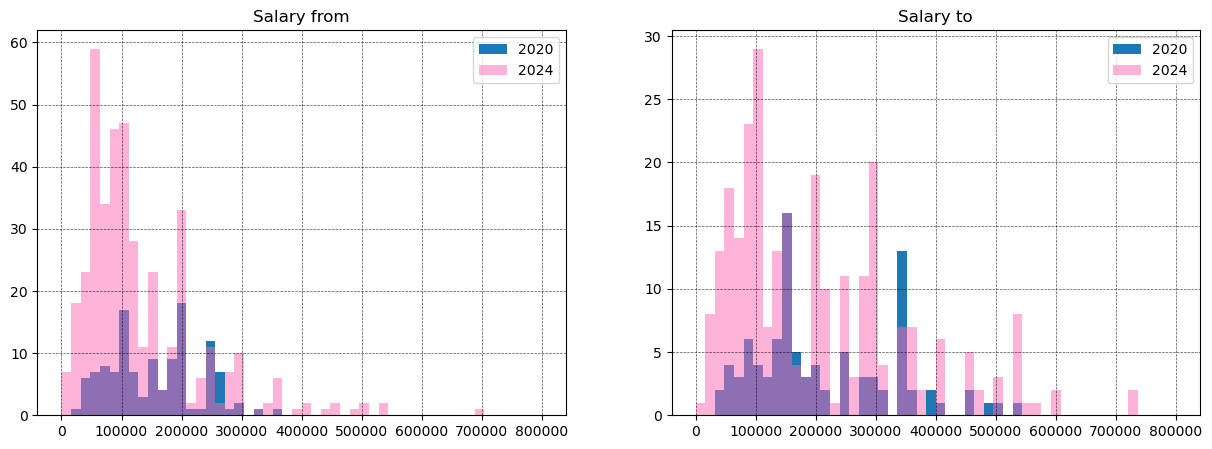

In [114]:
# put from and to salaries into one hist
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(df20_sal_from['salary_from'], bins=50, range=(0, 800000))
ax[0].hist(df24_sal_from['salary_from'], bins=50, range=(0, 800000), alpha=0.5, color='hotpink')
ax[0].set_title('Salary from')
ax[0].legend(['2020', '2024'])
# set a grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
# set colormap

ax[1].hist(df20_sal_to['salary_to'], bins=50, range=(0, 800000))
ax[1].hist(df24_sal_to['salary_to'], bins=50, range=(0, 800000), alpha=0.5, color='hotpink')
ax[1].set_title('Salary to')
ax[1].legend(['2020', '2024'])
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)


plt.show()

In [116]:
# describe salary_from and salary_to
df20_sal_to.describe()

,salary_to
count,9.500000e+01
mean,2.363937e+05
std,2.544402e+05
min,3.500000e+04
25%,1.300000e+05
50%,1.700000e+05
75%,3.307500e+05
max,2.400000e+06


In [117]:
df24_sal_to.describe()

,salary_to
count,2.750000e+02
mean,2.072203e+05
std,1.905536e+05
min,1.000000e+04
25%,8.500000e+04
50%,1.500000e+05
75%,2.950000e+05
max,2.250000e+06


## 2. Salary differences between countries
Difference in salary between countries

## 3. Junior positions and Internships vs. others
What terms and offers of employment are suggested for Junior developers and Interns nowadays and how does they differ from higher level positions?

## 4. Requirements

What skills are most in demand for Data Science and Machine Learning roles nowadays?

What level of education is required for Data Science jobs and how does it correlate with proposed salaries?